In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#import data
content_df = pd.read_csv('Content.csv',index_col=0)
content_df.head()

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...
3,356fff80-da4d-4785-9f43-bc1261031dc6,9fb4ce88-fac1-406c-8544-1a899cee7aaf,photo,technology,https://socialbuzz.cdn.com/content/storage/356...
4,01ab84dd-6364-4236-abbb-3f237db77180,e206e31b-5f85-4964-b6ea-d7ee5324def1,video,food,https://socialbuzz.cdn.com/content/storage/01a...


In [4]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   User ID     1000 non-null   object
 2   Type        1000 non-null   object
 3   Category    1000 non-null   object
 4   URL         801 non-null    object
dtypes: object(5)
memory usage: 46.9+ KB


In [5]:
# Summary of the data
content_df.describe()

,Content ID,User ID,Type,Category,URL
count,1000,1000,1000,1000,801
unique,1000,446,4,41,801
top,97522e57-d9ab-4bd6-97bf-c24d952602d2,72d2587e-8fae-4626-a73d-352e6465ba0f,photo,technology,https://socialbuzz.cdn.com/content/storage/975...
freq,1,8,261,71,1


In [6]:
content_df.drop(labels=['User ID','URL'],axis=1,inplace=True)

In [7]:
content_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  1000 non-null   object
 1   Type        1000 non-null   object
 2   Category    1000 non-null   object
dtypes: object(3)
memory usage: 31.2+ KB


In [8]:
#Check values in category columns
content_df['Category'].value_counts()

Category
technology           71
animals              67
travel               67
culture              63
science              63
fitness              61
food                 61
healthy eating       61
cooking              60
soccer               58
tennis               58
education            57
dogs                 56
studying             55
veganism             48
public speaking      48
Fitness               5
Animals               4
Science               4
"soccer"              3
"culture"             3
Soccer                3
"dogs"                2
Education             2
Studying              2
Travel                2
Food                  2
"veganism"            1
"public speaking"     1
Public Speaking       1
"technology"          1
"cooking"             1
Healthy Eating        1
"studying"            1
"food"                1
Culture               1
"tennis"              1
Technology            1
"animals"             1
Veganism              1
"science"             1
Name: c

* We'll need to clean up these categories by removing punctuation and capitalization.

In [9]:
#strip quote mark and lowercase all values
content_df['Category'] = content_df['Category'].apply(lambda x:x.strip('"').lower())

In [10]:
#checking if all categories are in lower case
content_df['Category'].value_counts()

Category
technology         73
animals            72
travel             69
science            68
culture            67
fitness            66
food               64
soccer             64
healthy eating     62
cooking            61
tennis             59
education          59
studying           58
dogs               58
public speaking    50
veganism           50
Name: count, dtype: int64

In [11]:
#rename content to content_type
content_df.rename(columns={'Type':'Content_Type'},inplace=True)
content_df['Content_Type'].value_counts()

Content_Type
photo    261
video    259
GIF      244
audio    236
Name: count, dtype: int64

In [12]:
#import 2nd dataset
reactions_df = pd.read_csv('Reactions.csv',index_col=0)
reactions_df.head()

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01


In [13]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25553 entries, 0 to 25552
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  25553 non-null  object
 1   User ID     22534 non-null  object
 2   Type        24573 non-null  object
 3   Datetime    25553 non-null  object
dtypes: object(4)
memory usage: 998.2+ KB


In [14]:
reactions_df.describe()

,Content ID,User ID,Type,Datetime
count,25553,22534,24573,25553
unique,980,500,16,25542
top,4b2d0fff-3b4f-43ca-a7df-c430479cb9ba,c76c3393-88e2-47b0-ac37-dc4f2053f5a5,heart,2020-10-29 20:51:08
freq,49,65,1622,2


* Again, we can drop the User ID column. We'll also need to drop rows with missing values, and change the "Datetime" column to a datetime data type. Finally, we'll need to change the "Type" column name like we did for the Content table.

In [15]:
# drop user ID column
reactions_df.drop(labels = ['User ID'],axis=1,inplace=True)

In [16]:
# convert dates to datetime
reactions_df['Datetime'] = pd.to_datetime(reactions_df['Datetime'])

In [17]:
#drop rows with missing values
reactions_df.dropna(inplace=True)

In [18]:
#rename column
reactions_df.rename(columns={"Type":'Reaction_Type'},inplace=True)

In [19]:
reactions_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Content ID     24573 non-null  object        
 1   Reaction_Type  24573 non-null  object        
 2   Datetime       24573 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(2)
memory usage: 767.9+ KB


In [20]:
#import 3rd Dataset
reactiontypes_df = pd.read_csv('ReactionTypes.csv',index_col=0)
reactiontypes_df.head()

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0
3,hate,negative,5
4,interested,positive,30


In [21]:
reactiontypes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Type       16 non-null     object
 1   Sentiment  16 non-null     object
 2   Score      16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [22]:
reactiontypes_df.describe()

,Score
count,16.000000
mean,39.625000
std,26.901983
min,0.000000
25%,14.250000
50%,40.000000
75%,66.250000
max,75.000000


In [23]:
#rename type column
reactiontypes_df.rename(columns={'Type':'Reaction_Type'},inplace=True)
reactiontypes_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Reaction_Type  16 non-null     object
 1   Sentiment      16 non-null     object
 2   Score          16 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 512.0+ bytes


In [24]:
reactiontypes_df.value_counts()

Reaction_Type  Sentiment  Score
adore          positive   72       1
cherish        positive   70       1
disgust        negative   0        1
dislike        negative   10       1
hate           negative   5        1
heart          positive   60       1
indifferent    neutral    20       1
interested     positive   30       1
intrigued      positive   45       1
like           positive   50       1
love           positive   65       1
peeking        neutral    35       1
scared         negative   15       1
super love     positive   75       1
want           positive   70       1
worried        negative   12       1
Name: count, dtype: int64

* It looks like our data is clean, based on the client's specifications (remove rows with missing values, drop unnecessary colunmns, and ensure data types match the column values).

# Data Modelling (creating a joined table for analysis)

In [25]:
#merge tables on content ID columns
top_performers = reactions_df.merge(content_df,on='Content ID')
top_performers

,Content ID,Reaction_Type,Datetime,Content_Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:51,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:58,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:58,photo,studying
...,...,...,...,...,...
24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:48,audio,technology
24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:02,audio,technology
24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-09-12 03:54:58,audio,technology
24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-11-04 20:08:31,audio,technology


In [26]:
#merge tables on reaction type column
top_performers = top_performers.merge(reactiontypes_df,on='Reaction_Type')
top_performers

,Content ID,Reaction_Type,Datetime,Content_Type,Category,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-11-07 09:43:50,photo,studying,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-01-06 19:13:01,photo,studying,negative,0
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-04-09 02:46:20,photo,studying,negative,0
3,9f737e0a-3cdd-4d29-9d24-753f4e3be810,disgust,2021-03-28 21:15:26,photo,healthy eating,negative,0
4,230c4e4d-70c3-461d-b42c-ec09396efb3f,disgust,2020-08-04 05:40:33,photo,healthy eating,negative,0
...,...,...,...,...,...,...,...
24568,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-10-04 22:26:33,audio,veganism,positive,72
24569,435007a5-6261-4d8b-b0a4-55fdc189754b,adore,2020-09-18 10:50:50,audio,veganism,positive,72
24570,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-10-31 03:58:44,GIF,culture,positive,72
24571,4e4c9690-c013-4ee7-9e66-943d8cbd27b7,adore,2020-06-25 15:12:29,GIF,culture,positive,72


* We have over 24,573 rows of data. Let's use this table to answer our business question regarding the top five categories with the largest aggregate popularity.

# Top Category Analysis

* The measure of popularity provided to us by the client is the "Score" column. To find the highest aggregate popularity for each category, we simply have to sum this value by category.

In [27]:
#group by category and calculate total score
top_five = top_performers.groupby('Category').size().sort_values(ascending=False)
top_five.head(5)

Category
animals           1897
science           1796
healthy eating    1717
food              1699
technology        1698
dtype: int64

In [34]:
# Create a DataFrame from the top_five Series
df = top_five.to_frame(name='Count').reset_index()

# Print the DataFrame
print(df)


           Category  Count
0           animals   1897
1           science   1796
2    healthy eating   1717
3              food   1699
4        technology   1698
5           culture   1676
6           cooking   1664
7            travel   1647
8            soccer   1457
9         education   1433
10          fitness   1395
11         studying   1363
12             dogs   1338
13           tennis   1328
14         veganism   1248
15  public speaking   1217


In [29]:
top_performers.to_csv('client_data.csv')

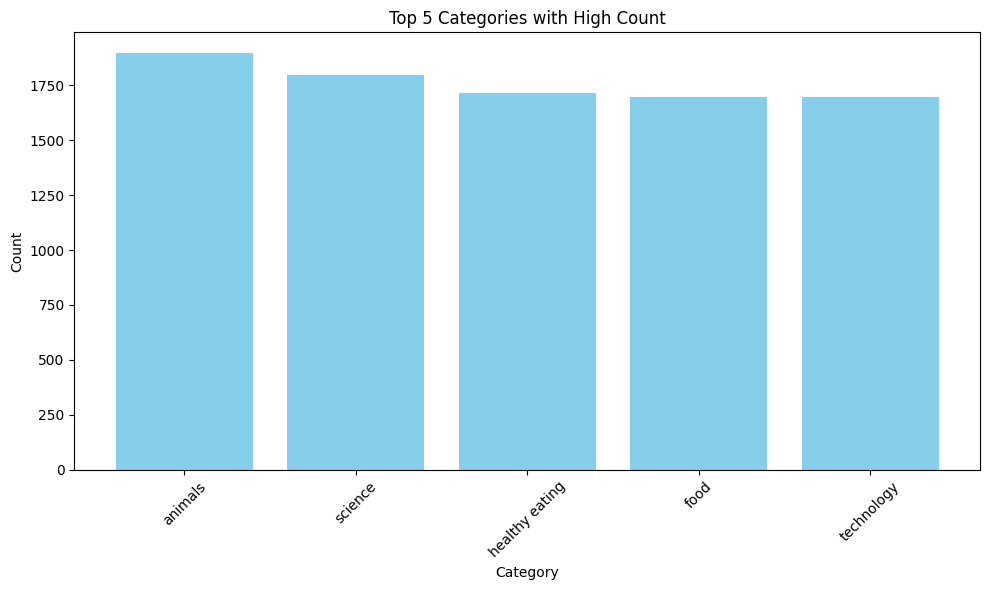

In [39]:
# Sort the data by count in descending order
sorted_data = df.sort_values(by='Count', ascending=False)

# Select the top 5 categories
top_categories = sorted_data.head(5)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(top_categories['Category'], top_categories['Count'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Top 5 Categories with High Count')
plt.xticks(rotation=45)  # Rotate category labels for better readability
plt.tight_layout()
plt.show()

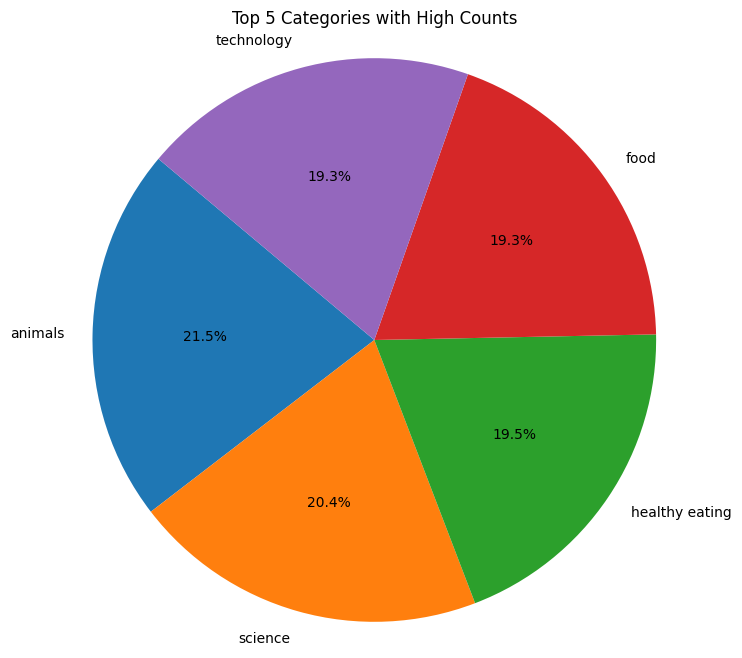

In [40]:
# Plotting pie chart
plt.figure(figsize=(8, 8))
plt.pie(top_categories['Count'], labels=top_categories['Category'], autopct='%1.1f%%', startangle=140)
plt.title('Top 5 Categories with High Counts')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()